<a href="https://colab.research.google.com/github/ApurbaPaul-NLP/Machine-Learning/blob/main/03_09_2022_Tweaking_the_Model_Building_a_Basic_Sentiment_Model_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd

In [5]:
path='/content/drive/MyDrive/TENSORLFOW/combined_data.csv'

dataset=pd.read_csv(path)
sentences=dataset['text'].tolist()
label=dataset['sentiment'].tolist()

In [6]:
training_size=int(len(sentences)*0.8)
training_size

1593

In [7]:
training_sentences=sentences[0:training_size]
testing_sentences=sentences[training_size:]
training_labels=label[0:training_size]
testing_labels=label[training_size:]

In [8]:
training_labels_final=np.array(training_labels)
testing_labels_final=np.array(testing_labels)

In [9]:
vocab_size=500
embedding_dim=16
max_length=50
# truc_type='post'
# padding_type='post'
oov_tok='<OOV>'

In [18]:
tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index=tokenizer.word_index
sequences=tokenizer.texts_to_sequences(training_sentences)
training_padded=pad_sequences(sequences,maxlen=max_length,padding='post',truncating='post')
testing_sequences=tokenizer.texts_to_sequences(testing_sentences)
testing_padded=pad_sequences(testing_sequences,maxlen=max_length,padding='post',truncating='post')

In [19]:
reverse_word_index=dict([(value,key) for key,value in word_index.items() ])
def decode_review(text):
  return ' '.join([reverse_word_index.get(i,'?') for i in text])

print(decode_review(padded[1])) 
print(training_sentences[1])   

good case excellent value ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
Good case Excellent value.


In [20]:
model=tf.keras.Sequential([
      tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
      tf.keras.layers.GlobalAveragePooling1D(),
      tf.keras.layers.Dense(6,activation='relu'),
      tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 16)            8000      
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 6)                 102       
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 8,109
Trainable params: 8,109
Non-trainable params: 0
_________________________________________________________________


In [21]:
num_epochs = 30
history=model.fit(training_padded,training_labels_final,epochs=num_epochs,validation_data=(testing_padded, testing_labels_final))

Epoch 1/30
50/50 [==============================] - 4s 7ms/step - loss: 0.6927 - accuracy: 0.5060 - val_loss: 0.6944 - val_accuracy: 0.4135
Epoch 2/30
50/50 [==============================] - 0s 5ms/step - loss: 0.6903 - accuracy: 0.5323 - val_loss: 0.6936 - val_accuracy: 0.4361
Epoch 3/30
50/50 [==============================] - 0s 5ms/step - loss: 0.6876 - accuracy: 0.5549 - val_loss: 0.6930 - val_accuracy: 0.4486
Epoch 4/30
50/50 [==============================] - 0s 4ms/step - loss: 0.6840 - accuracy: 0.5895 - val_loss: 0.6885 - val_accuracy: 0.5163
Epoch 5/30
50/50 [==============================] - 0s 4ms/step - loss: 0.6778 - accuracy: 0.6384 - val_loss: 0.6852 - val_accuracy: 0.5213
Epoch 6/30
50/50 [==============================] - 0s 5ms/step - loss: 0.6693 - accuracy: 0.6968 - val_loss: 0.6787 - val_accuracy: 0.5514
Epoch 7/30
50/50 [==============================] - 0s 5ms/step - loss: 0.6570 - accuracy: 0.7012 - val_loss: 0.6621 - val_accuracy: 0.6617
Epoch 8/30
50/50 [==

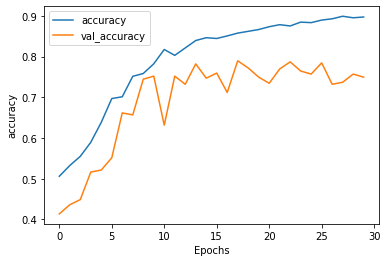

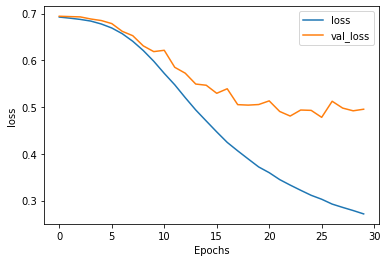

In [28]:
import matplotlib.pyplot as plt

def plot_graphs(history,string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")  
plot_graphs(history, "loss")

In [29]:
# First get the weights of the embedding layer
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(500, 16)


In [30]:
import io

# Create the reverse word index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Write out the embedding vectors and metadata
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [31]:
# Download the files
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
# Use the model to predict a review   
fake_reviews = ['I love this phone', 'I hate spaghetti', 
                'Everything was cold',
                'Everything was hot exactly as I wanted', 
                'Everything was green', 
                'the host seated us immediately',
                'they gave us free chocolate cake', 
                'not sure about the wilted flowers on the table',
                'only works when I stand on tippy toes', 
                'does not work when I stand on my head']

print(fake_reviews) 

# Create the sequences
padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(fake_reviews)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)           

print('\nHOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!\n')              

classes = model.predict(fakes_padded)

# The closer the class is to 1, the more positive the review is deemed to be
for x in range(len(fake_reviews)):
  print(fake_reviews[x])
  print(classes[x])
  print('\n')

# Try adding reviews of your own
# Add some negative words (such as "not") to the good reviews and see what happens
# For example:
# they gave us free chocolate cake and did not charge us

['I love this phone', 'I hate spaghetti', 'Everything was cold', 'Everything was hot exactly as I wanted', 'Everything was green', 'the host seated us immediately', 'they gave us free chocolate cake', 'not sure about the wilted flowers on the table', 'only works when I stand on tippy toes', 'does not work when I stand on my head']

HOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!

I love this phone
[0.89087224]


I hate spaghetti
[0.1927983]


Everything was cold
[0.59269255]


Everything was hot exactly as I wanted
[0.42868993]


Everything was green
[0.59269255]


the host seated us immediately
[0.5812886]


they gave us free chocolate cake
[0.8388048]


not sure about the wilted flowers on the table
[0.12233768]


only works when I stand on tippy toes
[0.8145257]


does not work when I stand on my head
[0.02841255]


